# Computation of LMC diffuse Background

https://notebook.community/obscode/bootcamp/MoreNotebooks/AstropySmorgasbord


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS
- creation date : June 22th 2021

The first step is to find good images of the LMC


In [1]:
from astroquery.ned import Ned
from astropy import coordinates
import astropy.units as u
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

import numpy as np

In [2]:
import matplotlib.ticker                         # here's where the formatter is


plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [3]:
from scipy import ndimage, misc

In [4]:
from astropy.coordinates import Angle
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u

from matplotlib.transforms import Affine2D
from astropy.visualization.wcsaxes import WCSAxes

# Simbad

In [5]:
from astroquery.simbad import Simbad
result_table = Simbad.query_object("LMC")
result_table 

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object
NAME LMC,05 23 34.6,-69 45 22,5,5,--,--,0,D,O,2003A&A...412...45P


In [6]:
result_table["RA","DEC"]

RA,DEC
"""h:m:s""","""d:m:s"""
str13,str13
05 23 34.6,-69 45 22


In [7]:
Angle(result_table["RA"][0],unit='hourangle')

<Angle 5.39294444 hourangle>

In [8]:
lmc_ra=Angle(result_table["RA"][0],unit='hourangle').degree
lmc_ra

80.89416666666666

In [9]:
Angle(result_table["DEC"][0],unit='degree')

<Angle -69.75611111 deg>

In [10]:
lmc_dec=Angle(result_table["DEC"][0],unit='degree').degree
lmc_dec

-69.75611111111111

# Ned query

In [11]:
result_table = Ned.query_object("lmc")
print(result_table)


No.      Object Name           RA     ... Diameter Points Associations
                            degrees   ...                             
--- ---------------------- ---------- ... --------------- ------------
  1 Large Magellanic Cloud   80.89386 ...               6            0


In [12]:
print(result_table.keys())

['No.', 'Object Name', 'RA', 'DEC', 'Type', 'Velocity', 'Redshift', 'Redshift Flag', 'Magnitude and Filter', 'Separation', 'References', 'Notes', 'Photometry Points', 'Positions', 'Redshift Points', 'Diameter Points', 'Associations']


In [13]:
result_table.show_in_notebook()

idx,No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
0,1,Large Magellanic Cloud,80.89386,-69.75613,G,278.0,0.000927,,0.9,--,7012,9,51,25,14,6,0


In [14]:
#result_table = Ned.query_region("lmc", radius=500 * u.arcmin)
#print(result_table)

In [15]:
from astropy import wcs
# Create a new WCS object.  The number of axes must be set
# from the start
w = wcs.WCS(naxis=2)

# Set up an "Airy's zenithal" projection
# Vector properties may be set with Python lists, or Numpy arrays
w.wcs.crpix = [-234.75, 8.3393]
w.wcs.cdelt = np.array([-0.066667, 0.066667])
w.wcs.crval = [0, -90]
w.wcs.ctype = ["RA---AIR", "DEC--AIR"]
w.wcs.set_pv([(2, 1, 45.0)])

## SkyView

In [16]:
from astroquery.skyview import SkyView

In [17]:
SkyView.list_surveys()

{'Allbands:GOODS/HDF/CDF': ['GOODS: Chandra ACIS HB',
                            'GOODS: Chandra ACIS FB',
                            'GOODS: Chandra ACIS SB',
                            'GOODS: VLT VIMOS U',
                            'GOODS: VLT VIMOS R',
                            'GOODS: HST ACS B',
                            'GOODS: HST ACS V',
                            'GOODS: HST ACS I',
                            'GOODS: HST ACS Z',
                            'Hawaii HDF U',
                            'Hawaii HDF B',
                            'Hawaii HDF V0201',
                            'Hawaii HDF V0401',
                            'Hawaii HDF R',
                            'Hawaii HDF I',
                            'Hawaii HDF z',
                            'Hawaii HDF HK',
                            'GOODS: HST NICMOS',
                            'GOODS: VLT ISAAC J',
                            'GOODS: VLT ISAAC H',
                            'GOODS: 

In [18]:
#pflist = SkyView.get_images(position='lmc', survey=['SDSSr'],radius=10 * u.arcmin)

In [19]:
#pflist=SkyView.get_images(position='lmc', survey=the_survey,radius=600 * u.arcmin)

# Mellinger

In [20]:
the_survey=['Mellinger Red','Mellinger Green','Mellinger Blue','H-Alpha Comp']
the_survey_color=["r","g","b","y"]

In [21]:
pflist=SkyView.get_images(position='lmc', survey=the_survey,radius=600 * u.arcmin)

In [22]:
NX=len(pflist)

 [astropy.io.fits.verify]


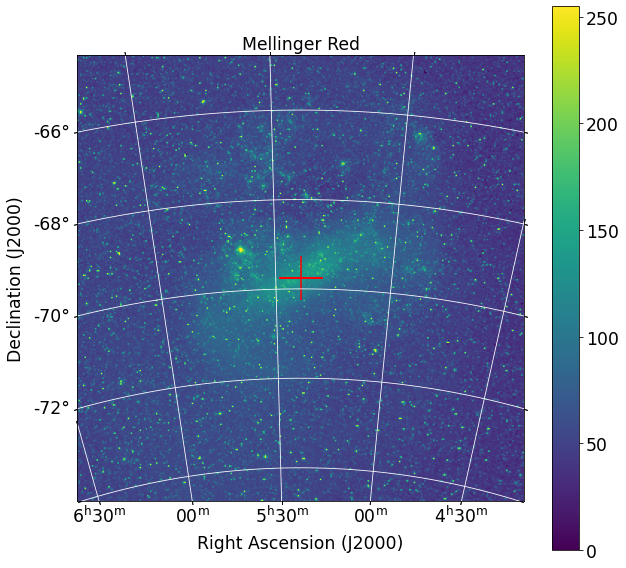

 [astropy.io.fits.verify]


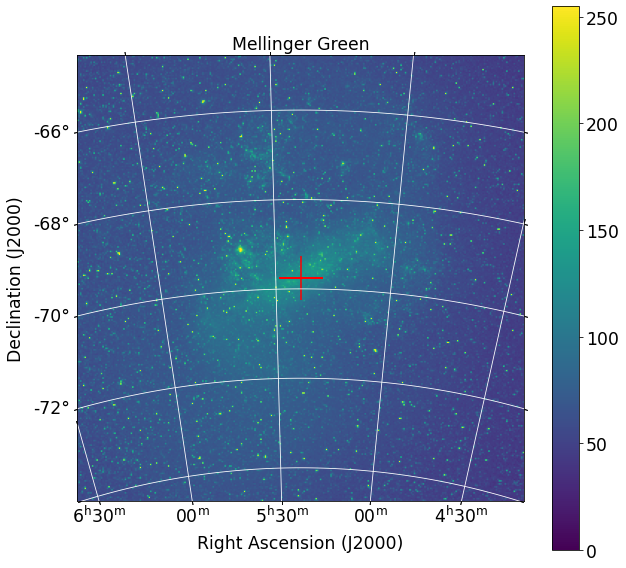

 [astropy.io.fits.verify]


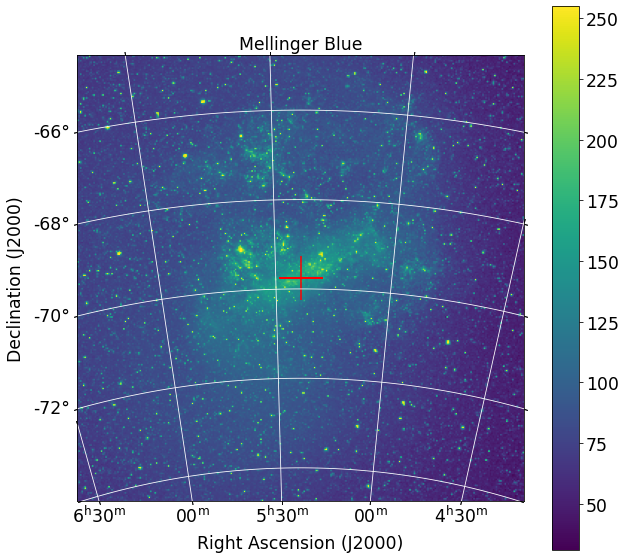

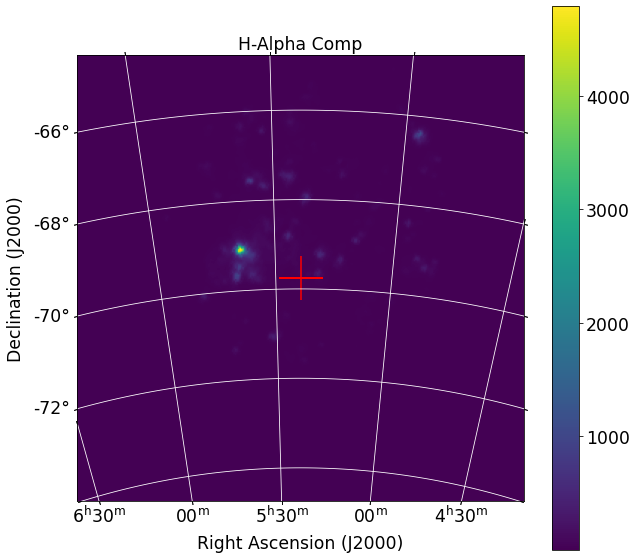

In [23]:
all_headers=[]
all_images=[]
all_wcs=[]
for ext in np.arange(NX):
    pf = pflist[ext] # first element of the list, might need a loop if multiple images
    image = pf[0].data

    head = pf[0].header
    wcs = WCS(head)
    
    fig=plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection=wcs)
    #ax = plt.subplot(projection=wcs)
    im=ax.imshow(image, cmap='viridis', origin='lower')
    #ax.grid(color='white', ls='solid')
    ax.set_xlabel('Right Ascension (J2000)')
    ax.set_ylabel('Declination (J2000)')
    the_title="{}".format(the_survey[ext])
    ax.set_title(the_title)
    ax.grid(color="w")
    plt.colorbar(im, ax=ax)
    sky=SkyCoord(lmc_ra*u.degree,lmc_dec*u.degree)
    x,y=wcs.world_to_pixel(sky)
    ax.scatter([x],[y],marker="+",s=2000,color='r')
    plt.show()
    
    all_headers.append(head)
    all_images.append(image)
    all_wcs.append(wcs)

In [24]:
#all_headers[0]

In [25]:
all_images[0].shape

(300, 300)

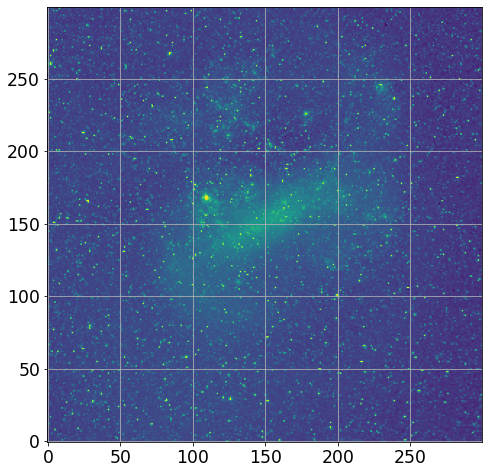

In [26]:
plt.imshow(all_images[0],origin="lower")
plt.grid()

(300, 300)

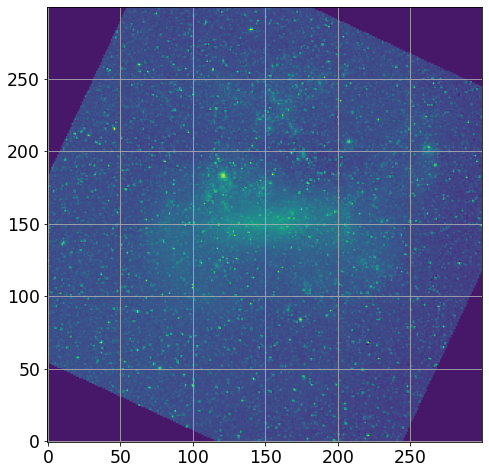

In [27]:
rot_img = ndimage.rotate(all_images[0],25, reshape=False)
plt.imshow(rot_img,origin="lower")
plt.grid()

rot_img.shape

# Calcul du bruit de fond en fonction de la distance

### Hypothese de symetrie circulaire

In [28]:
def GetCircle(image,wcs,ra0,dec0,RMIN,RMAX):
    """
    Extract a Circle in the image between RMIN and RMAX
    
    input arg:
     - image : input image
     - wcs   : wcs allowing to convert image pixel into world coordinate
     - ra0,dec0 : center of the image (assummed to be LMC center)
     - RMIN : all pixels r<RMIN are set to 0
     - RMAX : all pixels r>RMAX are set to 0
     
     output:
     - image with the ring
    
    """
    X=np.arange(image.shape[1])
    Y=np.arange(image.shape[0])
    
    xv, yv = np.meshgrid(X, Y)
    sky = wcs.pixel_to_world(xv, yv)
    sky_center=SkyCoord(ra0*u.deg,dec0*u.deg)
    
    sky_sep=sky.separation(sky_center)
    sky_sep_arcmin=sky_sep.arcmin
    
    
    new_image=np.where(np.logical_or(sky_sep_arcmin<RMIN,sky_sep_arcmin>=RMAX),0,image)
    
    return new_image

In [29]:
def GetDiffuseBackground_circ(the_image,the_wcs,lmc_ra,lmc_dec,rmin,rmax):
    """
    """
    NBINS=len(rmin)
    average_background=np.zeros(NBINS)
    
    for ibin in np.arange(NBINS):
    
        new_image=GetCircle(the_image,the_wcs,lmc_ra,lmc_dec,rmin[ibin],rmax[ibin])
        good_pixels=np.where(new_image>0) # do not average over empty pixels
        good_data=new_image[good_pixels]
        average_background[ibin]=np.median(good_data.ravel())
    return average_background

## Hypothese par tranche

In [30]:
def GetSlice(image,RMIN,RMAX):
    """
    """
    
    X=np.arange(image.shape[1])
    Y=np.arange(image[0].shape[0])
    
    xv, yv = np.meshgrid(X, Y)
    
    new_image=np.where(np.logical_or(yv<RMIN,yv>=RMAX),0,image)
    return new_image
    

In [31]:
def GetSliceinWorld(image,wcs,ra0,dec0,RMIN,RMAX):
    """
    """
    
    X=np.arange(image.shape[1])
    Y=np.arange(image[0].shape[0])
    
    xv, yv = np.meshgrid(X, Y)
    
    sky = wcs.pixel_to_world(xv, yv)
    sky_center=SkyCoord(ra0*u.deg,dec0*u.deg)
    #dsky=sky-sky_center
    
    new_image=np.where(np.logical_or(sky.dec.arcmin<sky_center.dec.arcmin+RMIN,sky.dec.arcmin>=sky_center.dec.arcmin+RMAX),
                       0,image)
    
    
    
    return new_image

In [32]:
def GetDiffuseBackground_lin(the_image,the_wcs,lmc_ra,lmc_dec,rmin,rmax,rotangle=25):
    """
    """
    NBINS=len(rmin)
    average_background=np.zeros(NBINS)
    
    for ibin in np.arange(NBINS):
            
        the_image_rot=ndimage.rotate(the_image,rotangle, reshape=False)
        new_image=GetSliceinWorld(the_image_rot,the_wcs,lmc_ra,lmc_dec,rmin[ibin],rmax[ibin])
        good_pixels=np.where(new_image>0) # do not average over empty pixels
        good_data=new_image[good_pixels]
        average_background[ibin]=np.median(good_data.ravel())
    return average_background

# Plot

In [33]:
idx=0
the_image=all_images[idx]
the_wcs=all_wcs[idx]

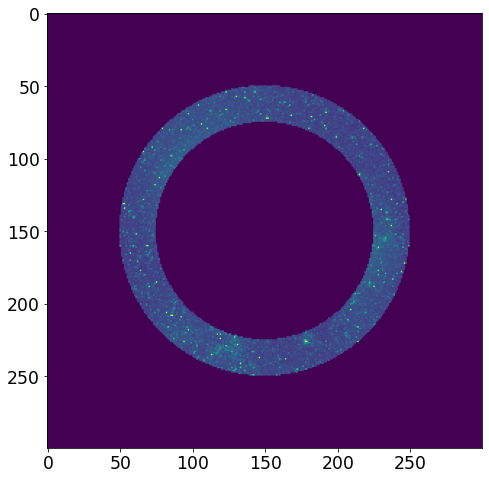

In [34]:
plt.imshow(GetCircle(the_image,the_wcs,lmc_ra,lmc_dec,150,200))

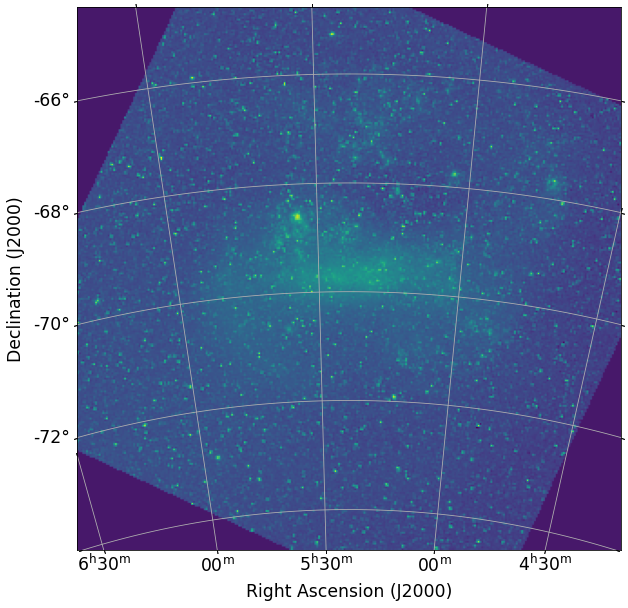

In [35]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection=wcs)
  
im=ax.imshow(rot_img, cmap='viridis', origin='lower')
  
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

ax.grid()

In [36]:
rot_img_cut=GetSliceinWorld(rot_img,the_wcs,lmc_ra,lmc_dec,-50,50)

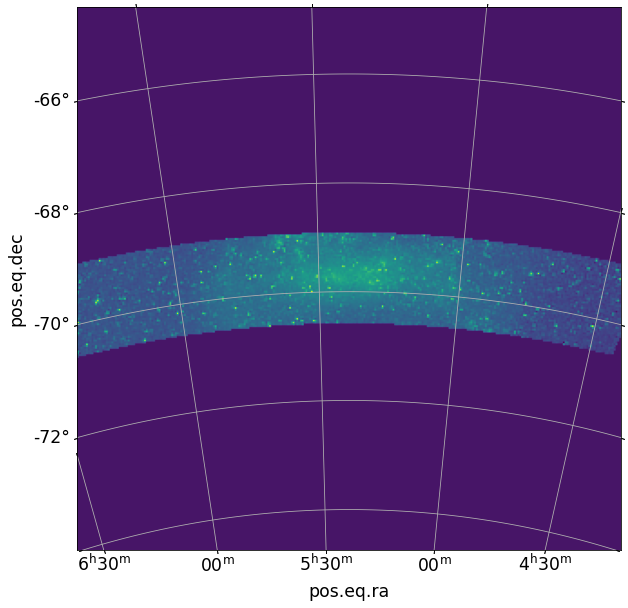

In [37]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection=wcs)
ax.imshow(rot_img_cut,origin="lower")
ax.grid()

# Diffuse Background

In [38]:
rmin=np.arange(0,290,10)
rmax=rmin+10
rav=(rmin+rmax)/2
NBINS=len(rmin)

Text(0.5, 1.0, 'LMC : Relative diffuse background in circular regions')

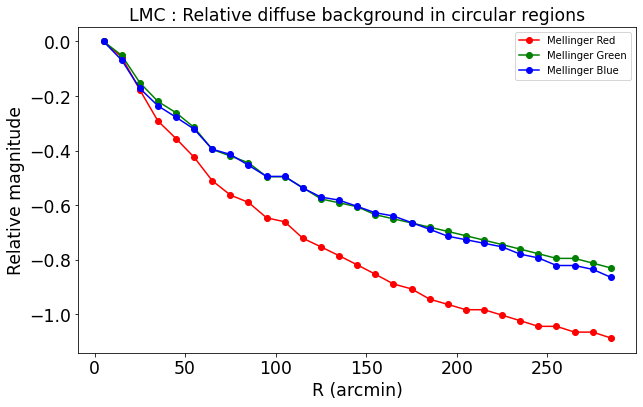

In [39]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

for ext in np.arange(NX-1):
    
    the_image=all_images[ext]
    the_wcs=all_wcs[ext]
    
    average_background=GetDiffuseBackground_circ(the_image,the_wcs,lmc_ra,lmc_dec,rmin,rmax)
    ax.plot(rav,2.5*np.log10(average_background/average_background[0]),"o-",color=the_survey_color[ext],label=the_survey[ext])
    
    
    
    ax.legend()
    ax.set_xlabel("R (arcmin)")
    ax.set_ylabel("Relative magnitude")
ax.set_title("LMC : Relative diffuse background in circular regions")  

Text(0.5, 1.0, 'LMC : Relative diffuse background in bands regions')

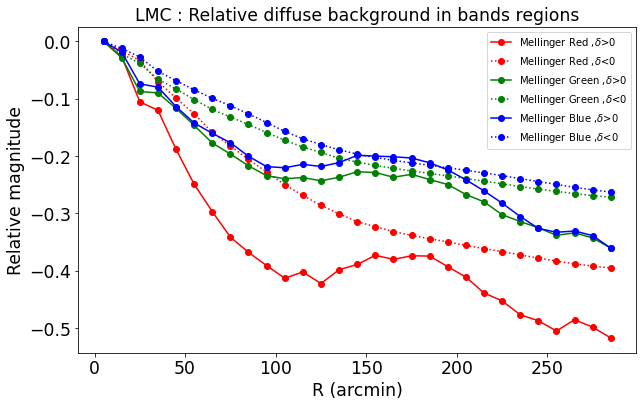

In [40]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)

for ext in np.arange(NX-1):
    
    the_image=all_images[ext]
    the_wcs=all_wcs[ext]
    
    average_background=GetDiffuseBackground_lin(the_image,the_wcs,lmc_ra,lmc_dec,rmin,rmax)
    ax.plot(rav,2.5*np.log10(average_background/average_background[0]),"o-",color=the_survey_color[ext],label=the_survey[ext]+" ,$\delta$>0")
    
    average_background=GetDiffuseBackground_lin(the_image,the_wcs,lmc_ra,lmc_dec,-rmax,rmin)
    ax.plot(rav,2.5*np.log10(average_background/average_background[0]),"o:",color=the_survey_color[ext],label=the_survey[ext]+" ,$\delta$<0")
    
    ax.legend()
    ax.set_xlabel("R (arcmin)")
    ax.set_ylabel("Relative magnitude")
ax.set_title("LMC : Relative diffuse background in bands regions")   